# ⏰ **STABILO DATA** ⏰

# **Stabilo Pre-train**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def load_onhw_dataset(base_path, subsets):
    all_train_data = []
    all_test_data = []
    all_train_labels = []
    all_test_labels = []

    for subset in subsets:
        subset_path = os.path.join(base_path, subset)

        X_train = np.load(os.path.join(subset_path, "X_train.npy"), allow_pickle=True)
        y_train = np.load(os.path.join(subset_path, "y_train.npy"), allow_pickle=True)
        X_test = np.load(os.path.join(subset_path, "X_test.npy"), allow_pickle=True)
        y_test = np.load(os.path.join(subset_path, "y_test.npy"), allow_pickle=True)

        all_train_data.append(X_train)
        all_test_data.append(X_test)
        all_train_labels.append(y_train)
        all_test_labels.append(y_test)

    # Merge all data
    merged_train_data = np.concatenate(all_train_data, axis=0)
    merged_test_data = np.concatenate(all_test_data, axis=0)
    merged_train_labels = np.concatenate(all_train_labels, axis=0)
    merged_test_labels = np.concatenate(all_test_labels, axis=0)
    return merged_train_data, merged_test_data, merged_train_labels, merged_test_labels

# Path to dataset in Google Drive
dataset_path = "/content/drive/My Drive/NeverLaTeX/AML/onhw-chars"
subsets = ["onhw2_both_indep_0", "onhw2_both_indep_1", "onhw2_both_indep_2", "onhw2_both_indep_3"]  # Example subsets

# Load and merge data
merged_train_data, merged_test_data, merged_train_labels, merged_test_labels = load_onhw_dataset(dataset_path, subsets)

In [4]:
# Select the desired columns within each sub-array
merged_train_data = np.array([arr[:, [0, 1, 2, 6, 7, 8, 9, 10, 11]]
                              for arr in merged_train_data if arr.size > 0], dtype=object)
merged_test_data = np.array([arr[:, [0, 1, 2, 6, 7, 8, 9, 10, 11]]
                             for arr in merged_test_data if arr.size > 0], dtype=object)

In [ ]:
for data in merged_train_data:
  print(data.shape)

for data in merged_test_data:
  print(data.shape)

Streaming output truncated to the last 5000 lines.
(80, 9)
(40, 9)
(48, 9)
(79, 9)
(74, 9)
(42, 9)
(66, 9)
(35, 9)
(37, 9)
(59, 9)
(70, 9)
(59, 9)
(63, 9)
(120, 9)
(42, 9)
(25, 9)
(41, 9)
(46, 9)
(50, 9)
(65, 9)
(43, 9)
(45, 9)
(56, 9)
(60, 9)
(31, 9)
(56, 9)
(45, 9)
(29, 9)
(44, 9)
(53, 9)
(32, 9)
(37, 9)
(47, 9)
(48, 9)
(31, 9)
(57, 9)
(52, 9)
(55, 9)
(44, 9)
(71, 9)
(66, 9)
(31, 9)
(78, 9)
(81, 9)
(65, 9)
(67, 9)
(79, 9)
(28, 9)
(50, 9)
(81, 9)
(53, 9)
(73, 9)
(87, 9)
(33, 9)
(45, 9)
(66, 9)
(65, 9)
(38, 9)
(66, 9)
(30, 9)
(33, 9)
(51, 9)
(43, 9)
(51, 9)
(51, 9)
(40, 9)
(44, 9)
(23, 9)
(43, 9)
(38, 9)
(67, 9)
(55, 9)
(40, 9)
(39, 9)
(49, 9)
(60, 9)
(28, 9)
(51, 9)
(36, 9)
(27, 9)
(47, 9)
(55, 9)
(30, 9)
(37, 9)
(57, 9)
(33, 9)
(30, 9)
(50, 9)
(57, 9)
(47, 9)
(38, 9)
(61, 9)
(59, 9)
(27, 9)
(53, 9)
(72, 9)
(57, 9)
(112, 9)
(59, 9)
(22, 9)
(52, 9)
(85, 9)
(40, 9)
(71, 9)
(104, 9)
(30, 9)
(41, 9)
(70, 9)
(63, 9)
(34, 9)
(56, 9)
(29, 9)
(33, 9)
(52, 9)
(45, 9)
(61, 9)
(46, 9)
(36, 9)
(4

In [5]:
# Scale sensor data using StandardScaler
scaler = StandardScaler()

length = merged_train_data.shape[0]
for i in range(merged_train_data.shape[0]):
  if merged_train_data[i].shape[0] > 0:
    merged_train_data[i] = scaler.fit_transform(merged_train_data[i])
  print(f"Processed {i+1}/{length}")

length = merged_test_data.shape[0]
for i in range(merged_test_data.shape[0]):
  if merged_test_data[i].shape[0] > 0:
    merged_test_data[i] = scaler.fit_transform(merged_test_data[i])
  print(f"Processed {i+1}/{length}")

Streaming output truncated to the last 5000 lines.
Processed 25441/30440
Processed 25442/30440
Processed 25443/30440
Processed 25444/30440
Processed 25445/30440
Processed 25446/30440
Processed 25447/30440
Processed 25448/30440
Processed 25449/30440
Processed 25450/30440
Processed 25451/30440
Processed 25452/30440
Processed 25453/30440
Processed 25454/30440
Processed 25455/30440
Processed 25456/30440
Processed 25457/30440
Processed 25458/30440
Processed 25459/30440
Processed 25460/30440
Processed 25461/30440
Processed 25462/30440
Processed 25463/30440
Processed 25464/30440
Processed 25465/30440
Processed 25466/30440
Processed 25467/30440
Processed 25468/30440
Processed 25469/30440
Processed 25470/30440
Processed 25471/30440
Processed 25472/30440
Processed 25473/30440
Processed 25474/30440
Processed 25475/30440
Processed 25476/30440
Processed 25477/30440
Processed 25478/30440
Processed 25479/30440
Processed 25480/30440
Processed 25481/30440
Processed 25482/30440
Processed 25483/30440
Pro

In [6]:
from tensorflow.keras import layers

# Create sequences and labels
sequences_train, labels_train = merged_train_data, merged_train_labels
sequences_test, labels_test = merged_test_data, merged_test_labels

# Map labels to integer indices
merged_labels = np.concatenate([labels_train, labels_test], axis=0)
unique_labels = list(set(merged_labels))
max_label_length = max([len(label) for label in unique_labels])
print(f"Max Label Length: {max_label_length}")
characters = set(char for label in unique_labels for char in label)

# Define a blank token (typically represented as an empty string or a special character)
blank_token = 'BLANK'

# Mapping characters to integers
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None, oov_token=blank_token
)

# Mapping integers back to original characters
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

labels_train = [char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8")) for label in labels_train]
labels_test = [char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8")) for label in labels_test]

# Verify the vocabulary including the blank index
print(f"Vocabulary: {char_to_num.get_vocabulary()}")
print(f"Blank token index: {char_to_num(blank_token).numpy()}")

Max Label Length: 1
Vocabulary: ['BLANK', 'o', 'H', 'G', 'Q', 'h', 'n', 'r', 'L', 'T', 'l', 'a', 'N', 'X', 'S', 'O', 'I', 'g', 'J', 'f', 's', 't', 'd', 'z', 'P', 'm', 'M', 'C', 'b', 'k', 'W', 'q', 'w', 'Z', 'c', 'x', 'y', 'F', 'U', 'i', 'A', 'D', 'V', 'v', 'Y', 'e', 'K', 'p', 'u', 'E', 'B', 'j', 'R']
Blank token index: 0


In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad the labels with a safe padding value, e.g., -1
padded_labels_train = pad_sequences(labels_train, maxlen=max_label_length, padding='post', value=-1)
padded_labels_test = pad_sequences(labels_test, maxlen=max_label_length, padding='post', value=-1)

# Convert to a TensorFlow tensor and replace -1 with the CTC blank index (0)
padded_labels_train = tf.where(padded_labels_train == -1, tf.cast(0, tf.int32), tf.convert_to_tensor(padded_labels_train, dtype=tf.int32))
padded_labels_test = tf.where(padded_labels_test == -1, tf.cast(0, tf.int32), tf.convert_to_tensor(padded_labels_test, dtype=tf.int32))

print(f"Padded Train Labels Shape: {padded_labels_train.shape}")  # Expected: (batch_size, max_label_length)
print(f"Padded Test Labels Shape: {padded_labels_test.shape}")  # Expected: (batch_size, max_label_length)

Padded Train Labels Shape: (94657, 1)
Padded Test Labels Shape: (30443, 1)


In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define padding parameters
max_length_train = max([len(seq) for seq in sequences_train])  # Longest sequence
max_length_test = max([len(seq) for seq in sequences_test])  # Longest sequence
max_length = max(max_length_train, max_length_test)
min_length = 0  # Minimum acceptable length for sequences

# Filter out very short sequences
filtered_sequences_train = [seq for seq in sequences_train if seq.shape[0] >= min_length]
filtered_labels_train = [label for seq, label in zip(sequences_train, labels_train) if seq.shape[0] >= min_length]
filtered_sequences_test = [seq for seq in sequences_test if seq.shape[0] >= min_length]
filtered_labels_test = [label for seq, label in zip(sequences_test, labels_test) if seq.shape[0] >= min_length]

# Pad sequences to the same length
padded_sequences_train = pad_sequences(filtered_sequences_train, maxlen=max_length, padding='post', dtype='float32', value=0)
padded_sequences_test = pad_sequences(filtered_sequences_test, maxlen=max_length, padding='post', dtype='float32', value=0)

# Verify the new shapes
print(f"Padded Sequences Train Shape: {padded_sequences_train.shape}")
print(f"Padded Sequences Test Shape: {padded_sequences_test.shape}")
print(f"Filtered Labels Train Count: {len(filtered_labels_train)}")
print(f"Filtered Labels Test Count: {len(filtered_labels_test)}")

print("Max length: ", max_length)

Padded Sequences Train Shape: (94648, 3475, 9)
Padded Sequences Test Shape: (30440, 3475, 9)
Filtered Labels Train Count: 94648
Filtered Labels Test Count: 30440
Max length:  3475


In [10]:
import tensorflow as tf
import random

# Force execution on CPU
with tf.device('/CPU:0'):
    # Ensure padded_sequences is a TensorFlow tensor
    padded_sequences_train = tf.convert_to_tensor(padded_sequences_train)
    padded_sequences_test = tf.convert_to_tensor(padded_sequences_test)

# Apply the fixed split_data function
X_train, X_test, y_train, y_test = padded_sequences_train, padded_sequences_test, filtered_labels_train, filtered_labels_test

In [11]:
def ctc_loss(y_true, y_pred):
    # Transpose y_pred if using logits_time_major=True (to [max_time, batch_size, num_classes])
    y_pred = tf.transpose(y_pred, [1, 0, 2])

    # Ensure y_true is of type int32 (or another allowed type)
    y_true = tf.cast(y_true, tf.int32)  # Cast to int32

    # Calculate input length (logit length) and label length
    logit_length = tf.fill([tf.shape(y_pred)[1]], tf.shape(y_pred)[0])  # shape: (batch_size,)
    label_length = tf.reduce_sum(tf.cast(tf.not_equal(y_true, 0), tf.int32), axis=1)  # shape: (batch_size,)

    # Compute the CTC loss using tf.nn.ctc_loss
    loss = tf.nn.ctc_loss(
        labels=y_true,
        logits=y_pred,
        label_length=label_length,
        logit_length=logit_length,
        logits_time_major=True,
        blank_index=0
    )

    return loss

In [12]:
from keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from tensorflow.keras.callbacks import LearningRateScheduler

# Define a learning rate scheduler function
def scheduler(epoch, lr):
  if epoch < 10:
    return float(lr)
  else:
    return float(lr * tf.math.exp(-0.1))

# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

In [13]:
batch_size = 64

# Prepare the data with the correctly padded labels
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Check shapes before training
for x_batch, y_batch in train_data.take(1):
    print("Batch X shape:", x_batch.shape)  # Expected: (batch_size, time_steps, features)
    print("Batch Y shape:", y_batch.shape)  # Expected: (batch_size, max_label_length)

Batch X shape: (64, 3475, 9)
Batch Y shape: (64, 1)


In [14]:
# Input shape and number of classes
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = len(char_to_num.get_vocabulary()) + 1  # Include the blank token (0 index)

print("Input shape:", input_shape)
print("Number of classes:", num_classes)

Input shape: (3475, 9)
Number of classes: 54


In [15]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the CLDNN Model without softmax
def create_cldnn_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape, name='input')

    # Convolutional Layers
    x = layers.Conv1D(512, 5, activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(256, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(128, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    # LSTM Layers
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    # Fully Connected Layer
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Linear Output Layer (No activation function)
    outputs = layers.Dense(num_classes)(x)

    # Define the model
    model = models.Model(inputs, outputs, name='CLDNN_Model')
    return model

# Create the CLDNN model
cldnn_model = create_cldnn_model(input_shape, num_classes)

# Compile the model with CTC loss
cldnn_model.compile(optimizer='adam', loss=ctc_loss)

# Display model summary
cldnn_model.summary()

# Train the model
cldnn_history = cldnn_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=1,
    callbacks=[early_stopping, lr_scheduler]
)

Model: "CLDNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 3475, 9)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 3475, 512)           │          23,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3475, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1737, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1737, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1737, 256)           │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1737, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 868, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 868, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 868, 128)            │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 868, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 434, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 434, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 434, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 434, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 434, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 434, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 434, 100)            │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 434, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 434, 54)             │           5,4

 Total params: 735,026 (2.80 MB)

 Trainable params: 733,234 (2.80 MB)

 Non-trainable params: 1,792 (7.00 KB)

1479/1479 ━━━━━━━━━━━━━━━━━━━━ 1483s 991ms/step - loss: 43.6534 - val_loss: 3.9598 - learning_rate: 0.0010


In [16]:
# Save the model

cldnn_model.save('cldnn_pretrained_model.h5')

# ⏰ **OUR DATA** ⏰

# **Step 1: Set Up the Environment**

In [17]:
# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [18]:
# Load the datasets
file_paths = {
    "all_data_1": "all_data1.csv",
    "all_data_2": "all_data2.csv",
    "all_data_3": "all_data3.csv",
    "all_data_4": "all_data4.csv",
    "all_data_5": "all_data5.csv",
    "all_data_6": "all_data6.csv",
    "all_data_7": "all_data7.csv",
    "all_data_8": "all_data8.csv",
    "all_data_9": "all_data9.csv",
    "all_data_10": "all_data10.csv",
    "all_data_11": "all_data11.csv",
    "all_data_12": "all_data12.csv",
    "all_data_13": "all_data13.csv",
    "all_data_14": "all_data14.csv",
    "all_data_15": "all_data15.csv",
    "all_data_16": "all_data16.csv",
    "all_data_17": "all_data17.csv",
    "all_data_18": "all_data18.csv",
    "all_data_19": "all_data19.csv",
    "all_data_20": "all_data20.csv",
    "all_data_21": "all_data21.csv",
    "all_data_22": "all_data22.csv",
    "all_data_23": "all_data23.csv",
    "all_data_24": "all_data24.csv",
    "all_data_25": "all_data25.csv",
    "all_data_26": "all_data26.csv",
    "all_data_27": "all_data27.csv",
    "all_data_28": "all_data28.csv",
    "all_data_29": "all_data29.csv",
    "all_data_30": "all_data30.csv",
    "all_data_31": "all_data31.csv",
    "all_data_32": "all_data32.csv",
    "all_data_33": "all_data33.csv",
    "all_data_34": "all_data34.csv",
    "all_data_35": "all_data35.csv",
    "all_data_36": "all_data36.csv",
    "all_data_37": "all_data37.csv",
    "all_data_38": "all_data38.csv",
    "all_data_39": "all_data39.csv",
    "all_data_40": "all_data40.csv",
    "all_data_41": "all_data41.csv",
    "all_data_42": "all_data42.csv"
}

In [19]:
# Load the datasets into pandas DataFrames
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# **Step 2: Preprocessing**

❗❗❗ **Do not forget to change the sensor_columns (depends on the dataset)!** ❗❗❗

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [22]:
# Combine datasets
combined_data = pd.concat([datasets[f"all_data_{i}"] for i in range(1, 43)], ignore_index=True)

# Filter out noise
filtered_data = combined_data[combined_data["Letter"] != "noise"]

# Define sensor columns
sensor_columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'Mag_X', 'Mag_Y', 'Mag_Z', 'Force1', 'Force2', 'Force3']

# Normalize sensor data (Z-score normalization)
scaler = StandardScaler()
filtered_data[sensor_columns] = scaler.fit_transform(filtered_data[sensor_columns])

<ipython-input-22-575800d582c7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[sensor_columns] = scaler.fit_transform(filtered_data[sensor_columns])


In [23]:
# Function to group data into sequences by label
def create_sequences(data):
    sequences = []
    labels = []
    current_label = None
    current_sequence = []

    for _, row in data.iterrows():
        if row["Letter"] != current_label:
            # Save the current sequence if it's not empty
            if current_sequence:
                sequences.append(np.array(current_sequence))
                labels.append(current_label)
            # Start a new sequence
            current_label = row["Letter"]
            current_sequence = []

        # Append sensor values to the current sequence
        current_sequence.append(row[sensor_columns].values)

    # Save the final sequence
    if current_sequence:
        sequences.append(np.array(current_sequence))
        labels.append(current_label)

    return np.array(sequences, dtype=object), labels

In [24]:
# prompt: shape of sequences and labels

# Create sequences and labels
sequences, labels = create_sequences(filtered_data)

# Print the shapes
print("Sequences shape:", sequences.shape)
print("Labels shape:", len(labels))

for seq, label in zip(sequences, labels):
    print(f"Sequence Shape: {seq.shape}, Label: {label}")


Sequences shape: (6827,)
Labels shape: 6827
Sequence Shape: (27, 12), Label: A
Sequence Shape: (22, 12), Label: B
Sequence Shape: (16, 12), Label: C
Sequence Shape: (20, 12), Label: D
Sequence Shape: (25, 12), Label: E
Sequence Shape: (21, 12), Label: F
Sequence Shape: (22, 12), Label: G
Sequence Shape: (21, 12), Label: H
Sequence Shape: (18, 12), Label: I
Sequence Shape: (17, 12), Label: J
Sequence Shape: (19, 12), Label: K
Sequence Shape: (14, 12), Label: L
Sequence Shape: (21, 12), Label: M
Sequence Shape: (17, 12), Label: N
Sequence Shape: (15, 12), Label: O
Sequence Shape: (20, 12), Label: P
Sequence Shape: (20, 12), Label: Q
Sequence Shape: (26, 12), Label: R
Sequence Shape: (17, 12), Label: S
Sequence Shape: (16, 12), Label: T
Sequence Shape: (16, 12), Label: U
Sequence Shape: (15, 12), Label: V
Sequence Shape: (17, 12), Label: W
Sequence Shape: (19, 12), Label: X
Sequence Shape: (16, 12), Label: Y
Sequence Shape: (20, 12), Label: Z
Sequence Shape: (20, 12), Label: a
Sequence Sh

In [26]:
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create sequences and labels
sequences, labels = create_sequences(filtered_data)

# Map labels to integer indices
unique_labels = list(set(labels))
max_label_length = max([len(label) for label in unique_labels])
characters = set(char for label in unique_labels for char in label)

print("max_label_length: ", max_label_length)

# Define a blank token (typically represented as an empty string or a special character)
blank_token = 'BLANK'

# Update the StringLookup layers with the extended vocabulary
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None, oov_token=blank_token
)

num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

# Map labels to integer indices, including the blank token where needed
labels = [char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8")) for label in labels]

# Verify the vocabulary including the blank index
print(f"Vocabulary: {char_to_num.get_vocabulary()}")
print(f"Blank token index: {char_to_num(blank_token).numpy()}")

# Pad the labels with a safe padding value, e.g., -1
padded_labels = pad_sequences(labels, maxlen=max_label_length, padding='post', value=-1)

# Convert to a TensorFlow tensor and replace -1 with the CTC blank index (0)
padded_labels = tf.where(padded_labels == -1, tf.cast(0, tf.int32), tf.convert_to_tensor(padded_labels, dtype=tf.int32))

print(f"Padded Labels Shape: {padded_labels.shape}")  # Expected: (batch_size, max_label_length)

max_label_length:  23
Vocabulary: ['BLANK', 'Q', 'G', 'h', 'r', '∛', '{', '€', '6', '-', 'ω', '≤', '∀', '£', "'", '÷', '>', 'b', 'w', ':', '(', 'F', '^', '∫', ',', '∈', 'A', 'D', ']', 'v', 'e', 'E', '≥', '∞', 'o', '?', '7', '5', 'O', '#', '*', 'J', '.', 'θ', '+', 't', 'd', 'C', 'W', '∂', '$', 'y', '"', '∉', 'μ', 'u', '9', 'H', '∏', '√', 'λ', 'R', '∑', '`', 'N', 'X', 'I', 'g', '∓', '%', '/', 'f', 's', '∜', ';', 'P', 'm', 'M', 'k', '=', 'Z', '8', 'x', '∆', 'U', '3', '&', '∮', '≠', 'π', 'Y', '}', 'p', 'B', '4', '<', '∇', 'j', 'V', '~', '!', ' ', ')', 'n', 'T', 'l', 'L', 'a', '±', 'S', '0', '≈', '∃', '2', 'z', 'q', '1', 'c', '[', 'i', '|', 'K', '@', '∋']
Blank token index: 0
Padded Labels Shape: (6827, 23)


In [27]:
# Define padding parameters
max_length = max([len(seq) for seq in sequences])  # Longest sequence
min_length = 0  # Minimum acceptable length for sequences

# Filter out very short sequences
filtered_sequences = [seq for seq in sequences if seq.shape[0] >= min_length]
filtered_labels = [label for seq, label in zip(sequences, padded_labels) if seq.shape[0] >= min_length]

# Pad sequences to the same length
padded_sequences = pad_sequences(filtered_sequences, maxlen=max_length, padding='post', dtype='float32', value=0)

# Verify the new shapes
print(f"Padded Sequences Shape: {padded_sequences.shape}")
print(f"Filtered Labels Count: {len(filtered_labels)}")

print("Max length: ", max_length)


Padded Sequences Shape: (6827, 182, 12)
Filtered Labels Count: 6827
Max length:  182


In [28]:
import tensorflow as tf
import random

def split_data(sequences, labels, train_size=0.7, shuffle=True):
    # Get dataset size
    size = tf.shape(sequences)[0].numpy()  # Get number of sequences

    # Create indices using TensorFlow's range
    indices = list(range(size))  # Using Python list to avoid TensorFlow slicing issues

    if shuffle:
        random.shuffle(indices)  # Shuffle indices in-place using Python

    # Calculate training set size
    train_samples = int(size * train_size)

    # Convert indices to TensorFlow tensors for tensor slicing
    train_idx = tf.convert_to_tensor(indices[:train_samples])
    valid_idx = tf.convert_to_tensor(indices[train_samples:])

    # Slice sequences properly using TensorFlow
    x_train = tf.gather(sequences, train_idx)
    x_valid = tf.gather(sequences, valid_idx)

    # Slice labels (which are lists of tensors) using Python indexing
    y_train = [labels[i] for i in indices[:train_samples]]
    y_valid = [labels[i] for i in indices[train_samples:]]

    return x_train, x_valid, y_train, y_valid

# Ensure padded_sequences is a TensorFlow tensor
padded_sequences_tensor = tf.convert_to_tensor(padded_sequences)

# Apply the fixed split_data function
X_train, X_test, y_train, y_test = split_data(padded_sequences_tensor, filtered_labels)

# Check types to confirm they remain unchanged
print(type(X_train), type(y_train))  # Expected: (tensorflow.Tensor, list)
print(type(X_test), type(y_test))    # Expected: (tensorflow.Tensor, list)


<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'list'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'list'>


In [29]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {len(y_train)}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {len(y_test)}")

X_train shape: (4778, 182, 12)
y_train shape: 4778
X_test shape: (2049, 182, 12)
y_test shape: 2049


# **Define CTC Loss**

In [30]:
def ctc_loss(y_true, y_pred):
    # Transpose y_pred if using logits_time_major=True (to [max_time, batch_size, num_classes])
    y_pred = tf.transpose(y_pred, [1, 0, 2])

    # Ensure y_true is of type int32 (or another allowed type)
    y_true = tf.cast(y_true, tf.int32)  # Cast to int32

    # Calculate input length (logit length) and label length
    logit_length = tf.fill([tf.shape(y_pred)[1]], tf.shape(y_pred)[0])  # shape: (batch_size,)
    label_length = tf.reduce_sum(tf.cast(tf.not_equal(y_true, 0), tf.int32), axis=1)  # shape: (batch_size,)

    # Compute the CTC loss using tf.nn.ctc_loss
    loss = tf.nn.ctc_loss(
        labels=y_true,
        logits=y_pred,
        label_length=label_length,
        logit_length=logit_length,
        logits_time_major=True,
        blank_index=0
    )

    ''' # Debugging shapes
    print("y_true shape:", y_true.shape)
    print("y_pred shape:", y_pred.shape)
    print("logit_length shape:", logit_length.shape)
    print("label_length shape:", label_length.shape) '''

    return loss

# **Common Model Processing**

In [31]:
from keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from tensorflow.keras.callbacks import LearningRateScheduler

# Define a learning rate scheduler function
def scheduler(epoch, lr):
  if epoch < 10:
    return float(lr)
  else:
    return float(lr * tf.math.exp(-0.1))

# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

In [32]:
batch_size = 32

# Prepare the data with the correctly padded labels
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Check shapes before training
for x_batch, y_batch in train_data.take(1):
    print("Batch X shape:", x_batch.shape)  # Expected: (batch_size, time_steps, features)
    print("Batch Y shape:", y_batch.shape)  # Expected: (batch_size, max_label_length)

Batch X shape: (32, 182, 12)
Batch Y shape: (32, 23)


In [33]:
# Input shape and number of classes
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = len(char_to_num.get_vocabulary()) + 1  # Include the blank token (0 index)

print("Input shape:", input_shape)
print("Number of classes:", num_classes)

Input shape: (182, 12)
Number of classes: 125


# **Step 3: Model**







**CLDNN**

In [34]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the CLDNN Model without softmax
def create_cldnn_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape, name='input')

    # Convolutional Layers
    x = layers.Conv1D(512, 5, activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(256, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(128, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    # LSTM Layers
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    # Fully Connected Layer
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Linear Output Layer (No activation function)
    outputs = layers.Dense(num_classes)(x)

    # Define the model
    model = models.Model(inputs, outputs, name='CLDNN_Model')
    return model

# Create the CLDNN model
cldnn_model = create_cldnn_model(input_shape, num_classes)

# Load IMU pretrained model
imu_model = tf.keras.models.load_model("cldnn_pretrained_model.h5",
                                       custom_objects={'ctc_loss': ctc_loss})

# Transfer weights
for i, layer in enumerate(cldnn_model.layers):
    try:
        pre_layer = imu_model.layers[i]

        if isinstance(layer, tf.keras.layers.Conv1D):
            pre_weights = pre_layer.get_weights()

            # Get feature count correctly
            full_features = tf.keras.backend.int_shape(layer.input)[-1]
            imu_features = tf.keras.backend.int_shape(pre_layer.input)[-1]

            extra_features = full_features - imu_features  # Additional features in new model

            if extra_features > 0:
                adjusted_weights = np.random.normal(size=(
                    pre_weights[0].shape[0], extra_features,
                    pre_weights[0].shape[2])) * 0.01
                new_weights = np.concatenate(
                    [pre_weights[0], adjusted_weights], axis=1)
                layer.set_weights([new_weights, pre_weights[1]])

            print(f"Loaded adjusted weights for layer: {layer.name}")

        else:
            layer.set_weights(pre_layer.get_weights())  # Copy normally if no mismatch
            print(f"Loaded weights for layer: {layer.name}")

    except Exception as e:
        print(f"Skipped loading for layer: {layer.name}. Error: {e}")

# Compile the model with CTC loss
cldnn_model.compile(optimizer='adam', loss=ctc_loss)

# Display model summary
cldnn_model.summary()

# Train the model
cldnn_history = cldnn_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping, lr_scheduler]
)

# Save the model
cldnn_model.save('cldnn_full_model.h5')

print("Fine-tuning complete. Model saved as 'cldnn_full_model.h5'.")

Loaded weights for layer: input
Loaded adjusted weights for layer: conv1d_3
Loaded weights for layer: batch_normalization_3
Loaded weights for layer: max_pooling1d_3
Loaded weights for layer: dropout_6
Loaded adjusted weights for layer: conv1d_4
Loaded weights for layer: batch_normalization_4
Loaded weights for layer: max_pooling1d_4
Loaded weights for layer: dropout_7
Loaded adjusted weights for layer: conv1d_5
Loaded weights for layer: batch_normalization_5
Loaded weights for layer: max_pooling1d_5
Loaded weights for layer: dropout_8
Loaded weights for layer: bidirectional_2
Loaded weights for layer: dropout_9
Loaded weights for layer: bidirectional_3
Loaded weights for layer: dropout_10
Loaded weights for layer: dense_2
Loaded weights for layer: dropout_11
Skipped loading for layer: dense_3. Error: Layer dense_3 weight shape (100, 125) is not compatible with provided weight shape (100, 54).


Model: "CLDNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 182, 12)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 182, 512)            │          31,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 182, 512)            │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 91, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 91, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 91, 256)             │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 91, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 45, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 45, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 45, 128)             │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 45, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 22, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 22, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 22, 100)             │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 22, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 22, 125)             │          12,6

 Total params: 749,877 (2.86 MB)

 Trainable params: 748,085 (2.85 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - loss: 35.9654 - val_loss: 16.9219 - learning_rate: 0.0010
Epoch 2/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 16.2051 - val_loss: 15.5543 - learning_rate: 0.0010
Epoch 3/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 15.5683 - val_loss: 15.1461 - learning_rate: 0.0010
Epoch 4/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 15.0947 - val_loss: 14.6547 - learning_rate: 0.0010
Epoch 5/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 14.7766 - val_loss: 14.2267 - learning_rate: 0.0010
Epoch 6/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 14.4208 - val_loss: 13.9964 - learning_rate: 0.0010
Epoch 7/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 14.2404 - val_loss: 13.7052 - learning_rate: 0.0010
Epoch 8/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 14.0068 - val_loss: 13.6481 - learning_rate: 0.0010
Epoch 9/500
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 13.8197 - val_loss: 13.33

Fine-tuning complete. Model saved as 'cldnn_full_model.h5'.



Evaluating Model: CLDNN
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Logits shape: (929, 6, 64)

Sample Predictions:
Prediction 1: w
Prediction 2: z
Prediction 3: w
Prediction 4: v
Prediction 5: U

Sample True vs. Predicted Comparisons:
True: A | Predicted: w
True: r | Predicted: z
True: w | Predicted: w
True: 5 | Predicted: v
True: n | Predicted: U

Sequence Accuracy for CLDNN: 29.06%


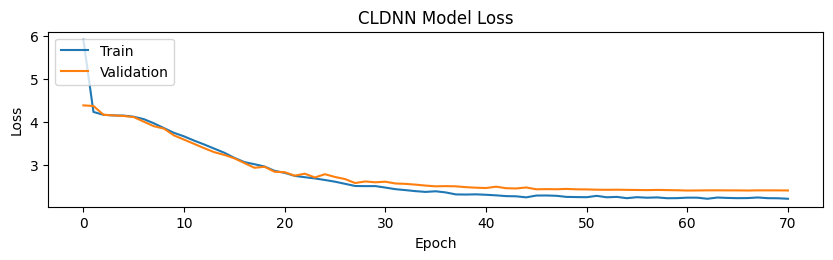


Summary of Model Performances:
CLDNN: Sequence Accuracy = 29.06%


In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Dictionary of pre-trained models and their histories
pretrained_models = {
    "CLDNN": (cldnn_model, cldnn_history)
}

# Placeholder for results
results = {}

# Iterate through each pre-trained model
for model_name, (model, history) in pretrained_models.items():
    print(f"\nEvaluating Model: {model_name}\n" + "=" * 50)

    # Generate raw predictions (logits) from the pre-trained model
    logits = model.predict(X_test)
    print(f"Logits shape: {logits.shape}")  # Expected shape: (batch_size, time_steps, num_classes)

    # Use CTC greedy decoder to convert logits to sequences
    decoded_predictions, _ = tf.nn.ctc_greedy_decoder(
        tf.transpose(logits, [1, 0, 2]),  # Transpose for time-major format
        tf.fill([tf.shape(logits)[0]], tf.shape(logits)[1])  # Input length
    )

    # Convert the sparse tensor to dense format
    dense_predictions = tf.sparse.to_dense(decoded_predictions[0], default_value=0)

    # Convert from numeric indices to characters using `num_to_char` mapping
    predicted_texts = [
        ''.join(num_to_char(index).numpy().decode('utf-8') for index in prediction if index > 0)
        for prediction in dense_predictions
    ]

    # Display a few predictions
    print("\nSample Predictions:")
    for i, pred in enumerate(predicted_texts[:5]):
        print(f"Prediction {i+1}: {pred}")

    # Convert y_test (true labels) back to readable text
    true_texts = [
        ''.join(num_to_char(index).numpy().decode('utf-8') for index in label if index > 0)
        for label in y_test
    ]

    # Display a few comparisons
    print("\nSample True vs. Predicted Comparisons:")
    for i in range(5):
        print(f"True: {true_texts[i]} | Predicted: {predicted_texts[i]}")

    # Calculate sequence accuracy
    sequence_accuracy = sum([1 for true, pred in zip(true_texts, predicted_texts) if true == pred]) / len(true_texts)
    print(f"\nSequence Accuracy for {model_name}: {sequence_accuracy * 100:.2f}%")

    # Store results
    results[model_name] = sequence_accuracy

    # Plot model loss
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Summary of all model performances
print("\nSummary of Model Performances:\n" + "=" * 50)
for model_name, accuracy in results.items():
    print(f"{model_name}: Sequence Accuracy = {accuracy * 100:.2f}%")